In [1]:
import pandas as pd
import numpy as np

# === Parameters ===
c_p = 4186  # J/(kg·°C)
rho = 1000  # kg/m³

# === Load Excel File ===
file_path = "RES4BUILD.xlsx"
xls = pd.ExcelFile(file_path)

# === Ignore info sheet ===
sheets = [s for s in xls.sheet_names if s.lower() != "info"]

# === Dictionary to store processed data ===
dfs = {}

for sheet_name in sheets:
    df = xls.parse(sheet_name)
    
    # Skip if datetime column missing
    if 'Date&time_x' not in df.columns:
        print(f"Skipping sheet {sheet_name}: 'Date&time_x' not found")
        continue

    # Convert datetime
    df['Date&time_x'] = pd.to_datetime(df['Date&time_x'], errors='coerce')
    df = df.dropna(subset=['Date&time_x'])
    df.set_index('Date&time_x', inplace=True)

    # Resample in 10-min intervals
    df = df.resample("10min").mean()

    # Calculate thermal power if columns exist
    required_cols = {'SH_INLET', 'SH_RETURN', 'FLOW_FAN_COILS_INDOOR'}
    if required_cols.issubset(df.columns):
        flow_kg_s = df['FLOW_FAN_COILS_INDOOR'] * rho / 3600  # m³/h → kg/s
        delta_T = df['SH_INLET'] - df['SH_RETURN']
        df['PHI_H'] = flow_kg_s * c_p * delta_T  # Watts
    else:
        print(f"Skipping thermal calculation in {sheet_name}: missing columns")

    dfs[sheet_name] = df



Skipping thermal calculation in 03-10-2022_NO HEAT: missing columns
Skipping thermal calculation in 04-10-2022_NO HEAT: missing columns
Skipping thermal calculation in 05-10-2022_NO HEAT: missing columns
Skipping thermal calculation in 06-10-2022_NO HEAT: missing columns
Skipping thermal calculation in 07-10-2022_NO HEAT: missing columns
Skipping thermal calculation in 08-10-2022_NO HEAT: missing columns
Skipping thermal calculation in 09-10-2022_NO HEAT: missing columns


In [2]:
# Common settings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

time_formatter = mdates.DateFormatter('%H:%M')
indoor_color = 'tab:blue'
outdoor_color = 'tab:orange'
power_color = 'tab:green'

# Modified function to show thermal power instead of solar radiation
def plot_temperature_power(df, title):
    fig, ax1 = plt.subplots(figsize=(6.5, 5))  # closer to square for paper layout

    ax1.plot(df.index, df['INDOOR_TEMP'], label='Indoor Temp [°C]', color=indoor_color)
    ax1.plot(df.index, df['OUTDOOR_TEMP'], label='Outdoor Temp [°C]', color=outdoor_color)
    ax1.set_ylabel('Temperature [°C]')
    ax1.set_title(title)
    ax1.xaxis.set_major_formatter(time_formatter)
    ax1.tick_params(axis='x', rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(df.index, df['PHI_H'], label='Thermal Power [W]', color=power_color, alpha=0.7)
    ax2.set_ylabel('Thermal Power [W]', color=power_color)
    ax2.tick_params(axis='y', labelcolor=power_color)

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.xlabel('Time of Day')
    plt.tight_layout()
    plt.show()


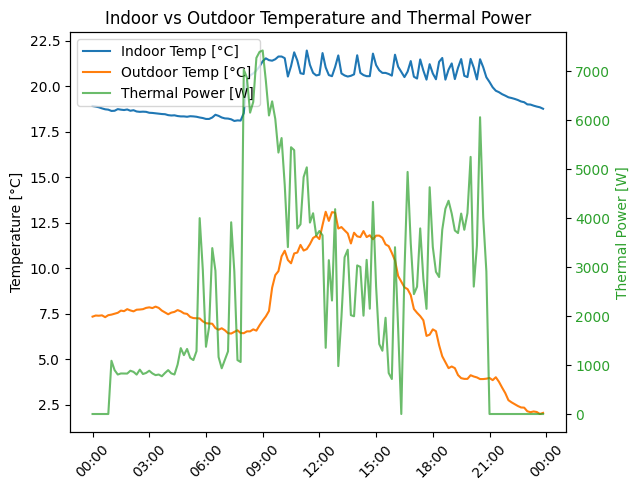

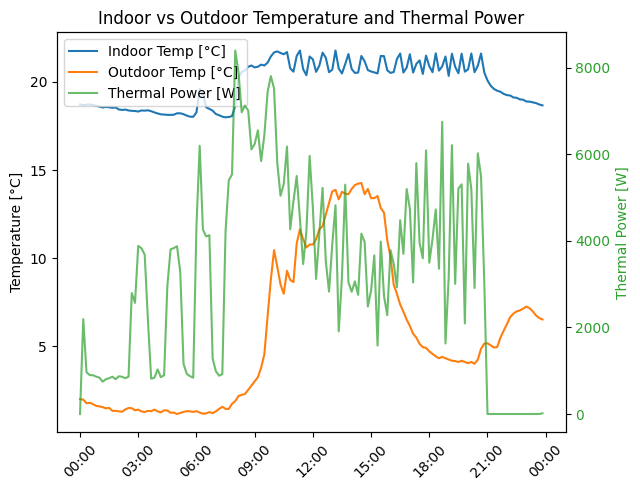

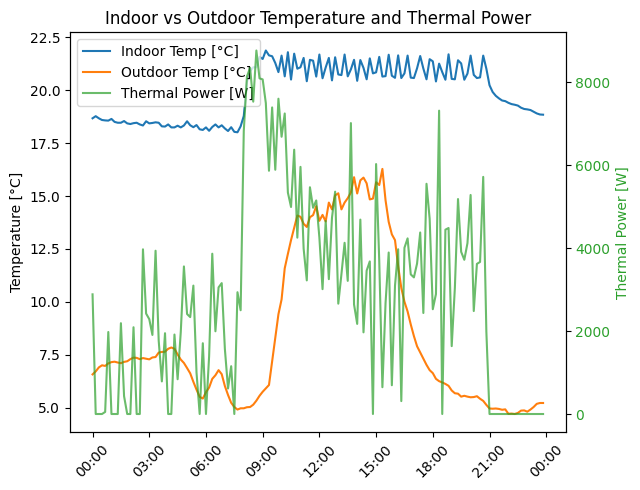

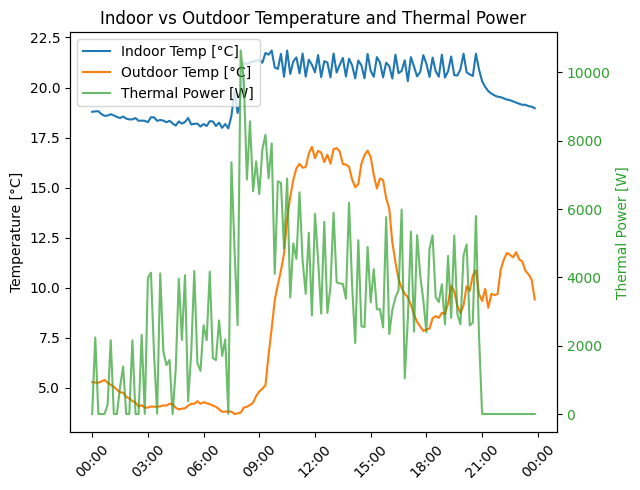

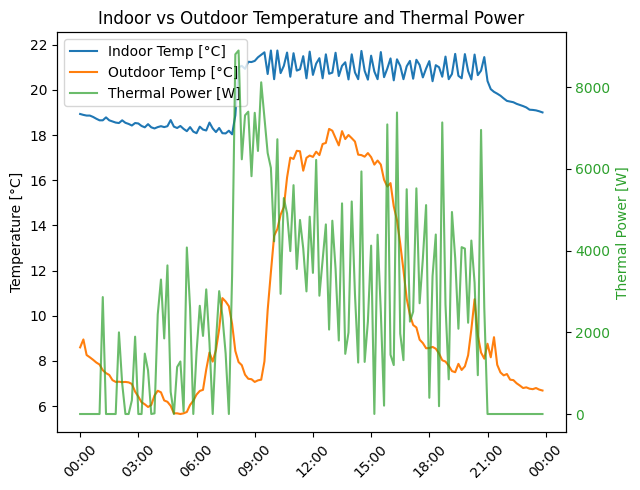

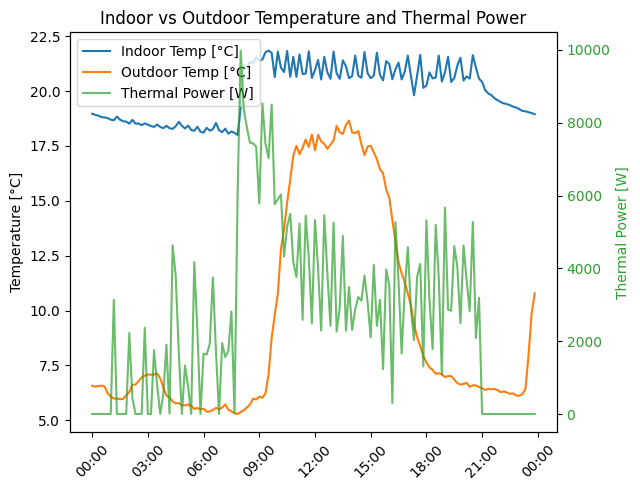

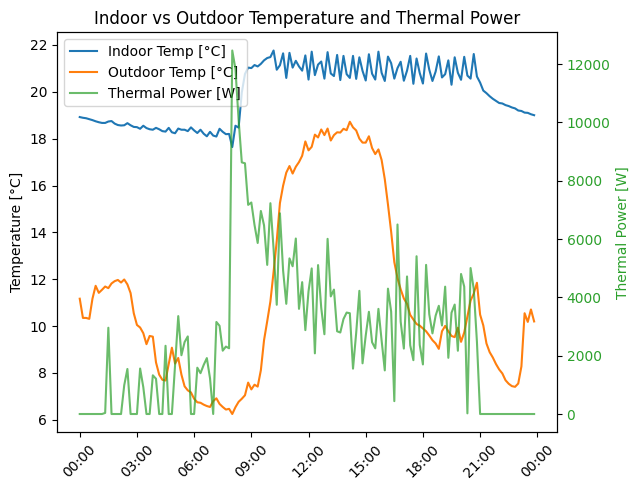

In [3]:
plot_temperature_power(dfs['21-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Thermal Power')
plot_temperature_power(dfs['22-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Thermal Power')
plot_temperature_power(dfs['23-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Thermal Power')
plot_temperature_power(dfs['24-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Thermal Power')
plot_temperature_power(dfs['25-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Thermal Power')
plot_temperature_power(dfs['26-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Thermal Power')
plot_temperature_power(dfs['27-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Thermal Power')


In [6]:
# Common settings 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

time_formatter = mdates.DateFormatter('%H:%M')
indoor_color = 'tab:blue'
outdoor_color = 'tab:orange'
solar_color = 'tab:red'

# Function for indoor/outdoor temp vs solar radiation
def plot_temperature_solar(df, title):
    fig, ax1 = plt.subplots(figsize=(6.5, 5))  # closer to square for paper layout

    ax1.plot(df.index, df['INDOOR_TEMP'], label='Indoor Temp [°C]', color=indoor_color)
    ax1.plot(df.index, df['OUTDOOR_TEMP'], label='Outdoor Temp [°C]', color=outdoor_color)
    ax1.set_ylabel('Temperature [°C]')
    ax1.set_title(title)
    ax1.xaxis.set_major_formatter(time_formatter)
    ax1.tick_params(axis='x', rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(df.index, df['PYRANOMETER'], label='Solar Radiation [W/m²]', color=solar_color, alpha=0.6)
    ax2.set_ylabel('Solar Radiation [W/m²]', color=solar_color)
    ax2.tick_params(axis='y', labelcolor=solar_color)

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.xlabel('Time of Day')
    plt.tight_layout()
    plt.show()


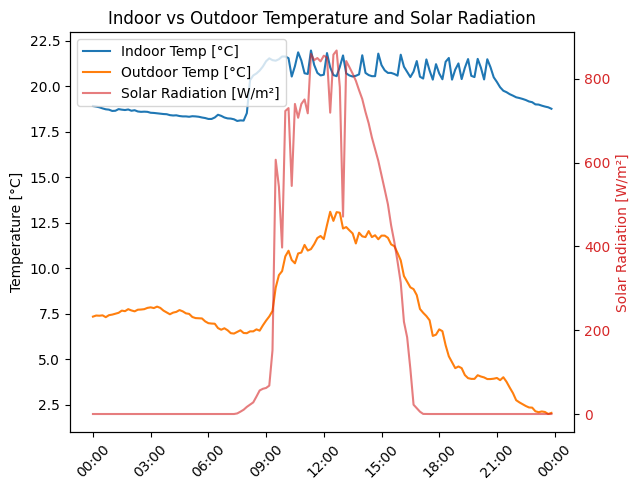

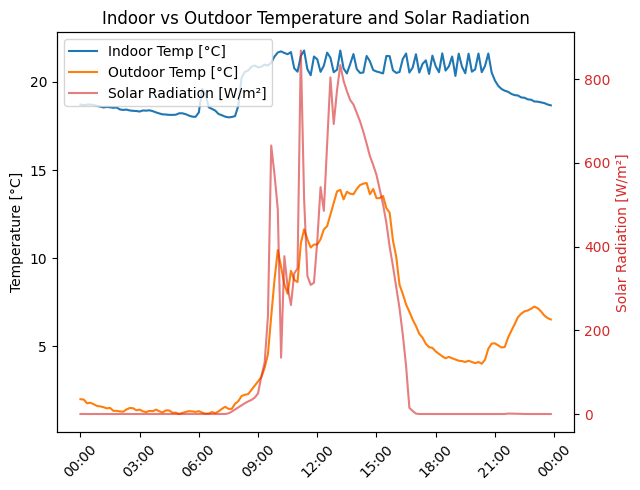

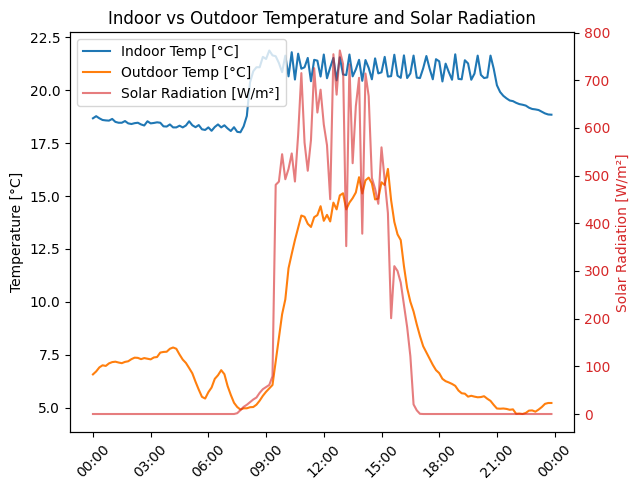

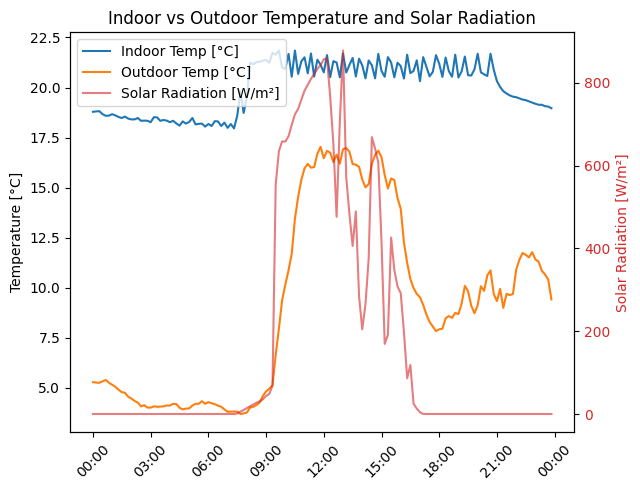

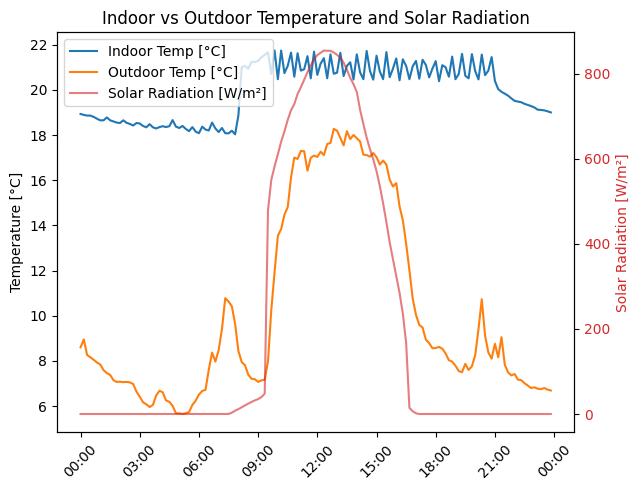

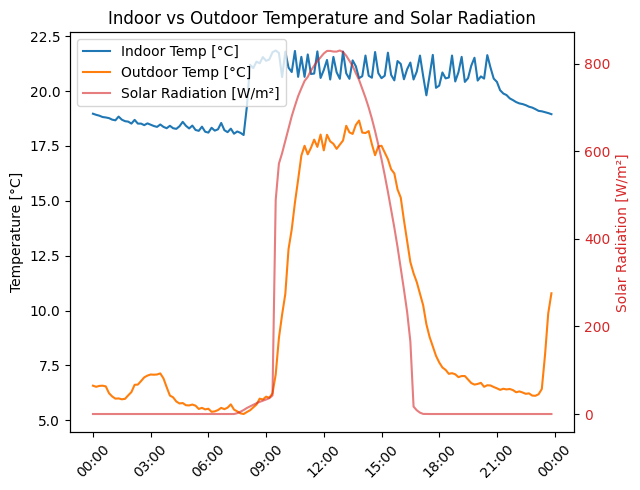

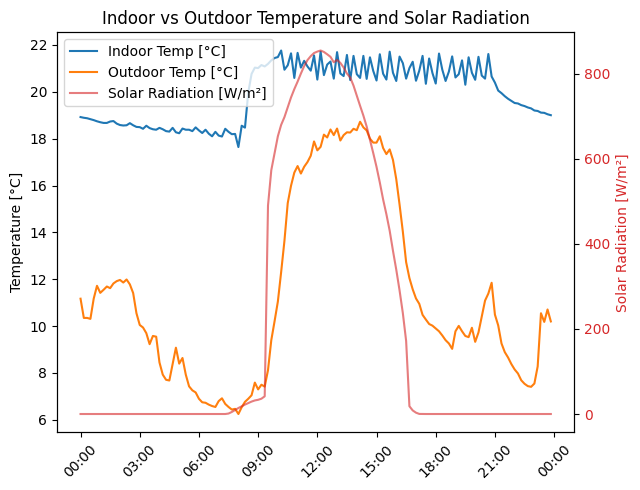

In [7]:
plot_temperature_solar(dfs['21-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Solar Radiation')
plot_temperature_solar(dfs['22-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Solar Radiation')
plot_temperature_solar(dfs['23-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Solar Radiation')
plot_temperature_solar(dfs['24-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Solar Radiation')
plot_temperature_solar(dfs['25-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Solar Radiation')
plot_temperature_solar(dfs['26-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Solar Radiation')
plot_temperature_solar(dfs['27-12-2022_WITH HEAT'], title='Indoor vs Outdoor Temperature and Solar Radiation')
